In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
res = pd.read_csv('data/omni.tsv', sep="\t")
res

,tool,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only,celltype
0,GENIE3,kidney distal convoluted tubule epithelial cell,6.14,0.00261,0.00109,12.9,True,True,False
1,GENIE3,kidney distal convoluted tubule epithelial cell,1.59,0.00108,0.00109,3.2,False,False,True
2,GENIE3,kidney loop of Henle thick ascending limb epit...,4.07,0.00319,0.00121,2.5,True,True,True
3,GENIE3,kidney loop of Henle thick ascending limb epit...,0.43,0.00118,0.00121,7.5,False,False,True
4,GENIE3,kidney collecting duct principal cell,10.91,0.00500,0.00139,1.4,True,True,True
5,GENIE3,kidney collecting duct principal cell,1.48,0.00146,0.00139,4.3,False,False,True
6,GENIE3,mesangial cell,7.15,0.00279,0.00122,7.1,True,True,True
7,GENIE3,mesangial cell,0.75,0.00123,0.00122,2.4,False,False,False
8,GENIE3,blood vessel smooth muscle cell,6.58,0.00505,0.00165,3.8,True,True,True
9,GENIE3,blood vessel smooth muscle cell,1.11,0.00180,0.00165,5.7,False,False,True


In [27]:
plt.rcParams.update({'font.size': 14})


In [26]:
res['TF_only'] = res['TF_only'].replace({True: 'TF-gene only', False: "All"})
res = res.rename(columns={'TF_only': 'Format'})

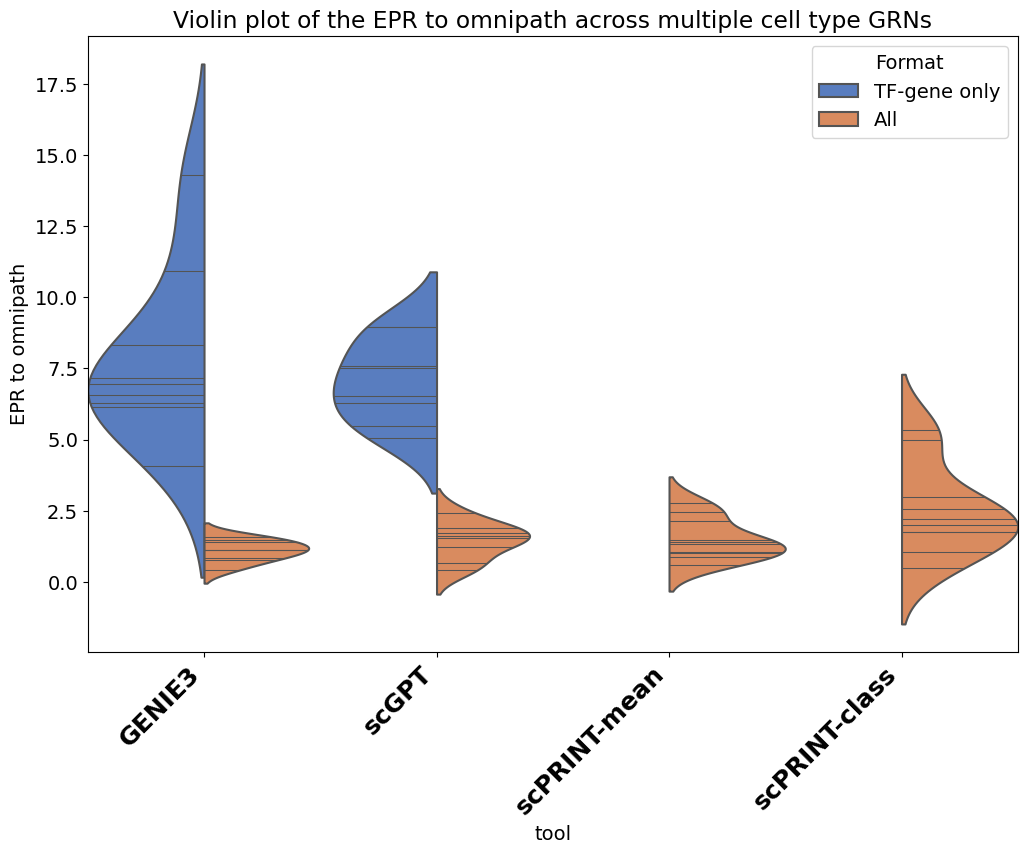

In [12]:
# Set the aesthetic style of the plots

# Create the violin plot with adjusted scale to fix the tiny side issue
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='tool', y='EPR', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Set the title and labels of the plot
violin_plot.set_title('Violin plot of the EPR to omnipath across multiple cell type GRNs')
violin_plot.set_xlabel('tool')
violin_plot.set_ylabel('EPR to omnipath')

# Rotate the x labels for better readability and align them
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i < 4:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)

# Show the plot
plt.show()


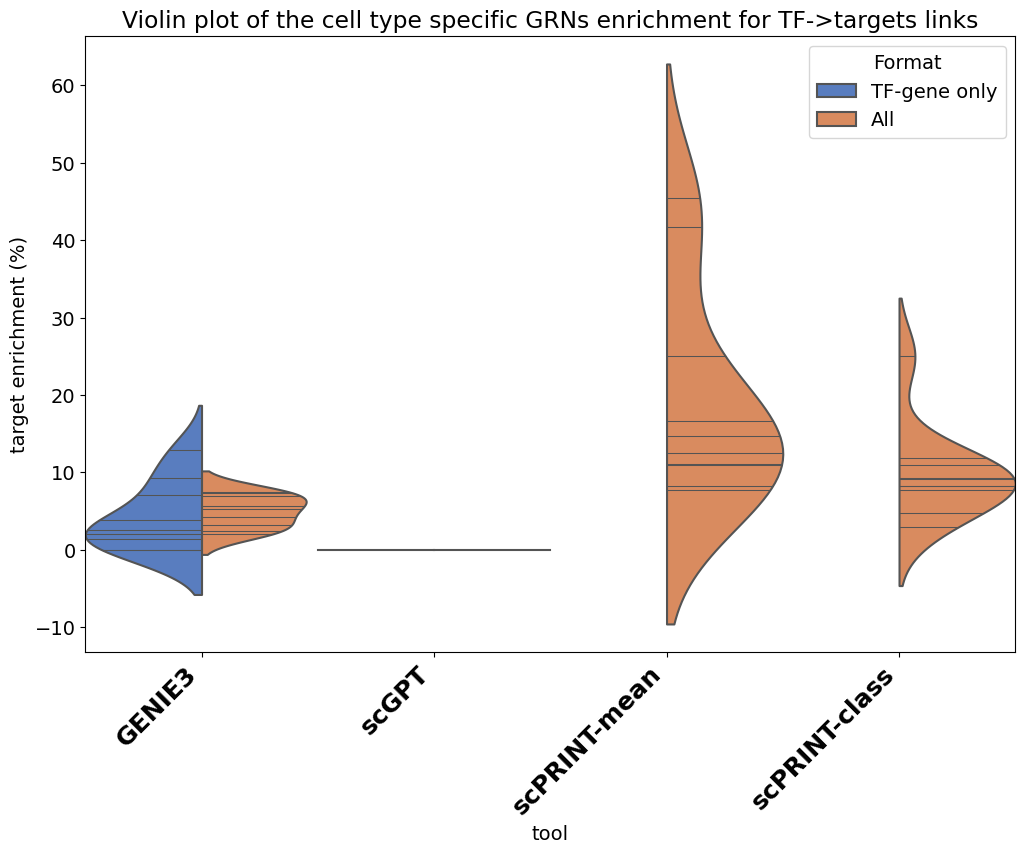

In [13]:
# Create the violin plot
plt.figure(figsize=(12, 8))

violin_plot = sns.violinplot(x='tool', y='TF_targ', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Set the title and labels of the plot
violin_plot.set_title('Violin plot of the cell type specific GRNs enrichment for TF->targets links')
violin_plot.set_xlabel('tool')
violin_plot.set_ylabel('target enrichment (%)')

# Rotate the x labels for better readability
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i < 4:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)
# Show the plot
plt.show()

In [23]:
res['AUPRC'] = res['AUPRC'] - res['RAND']

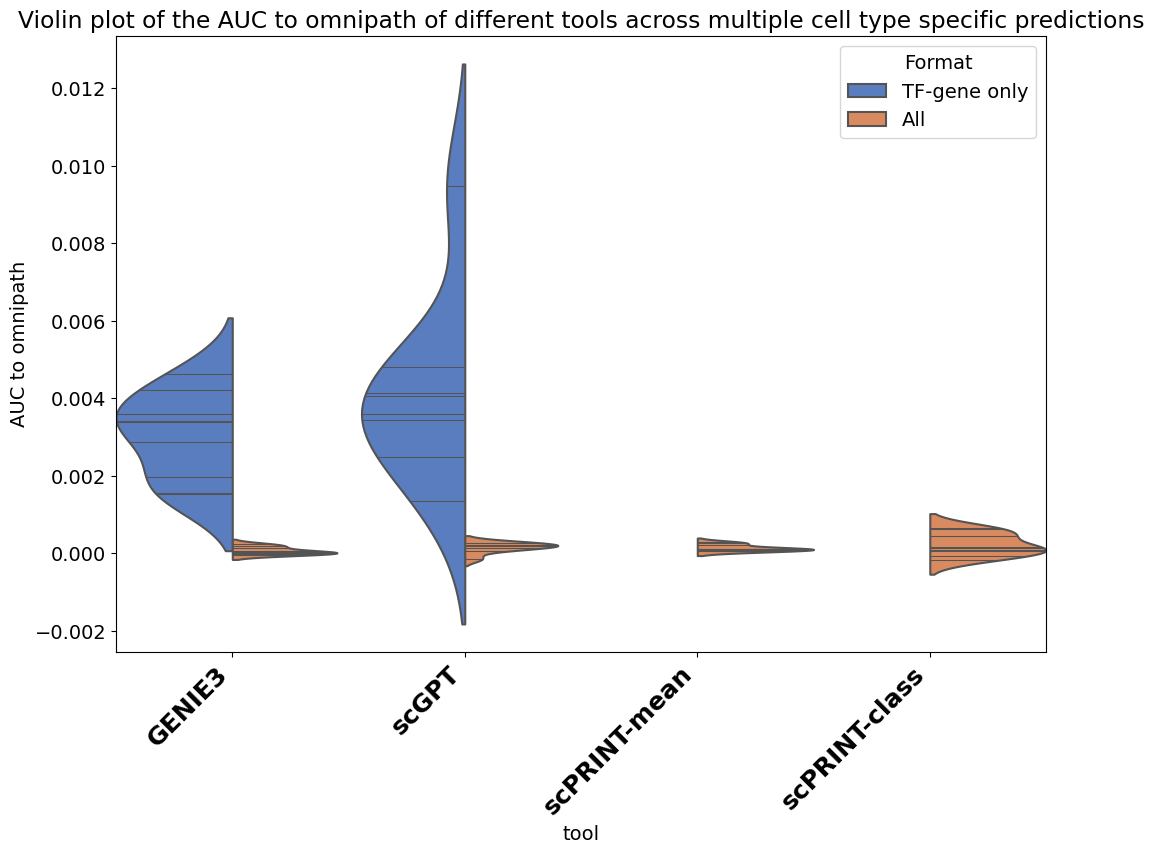

In [28]:
# Create the violin plot
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='tool', y='AUPRC', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Set the title and labels of the plot
violin_plot.set_title('Violin plot of the AUC to omnipath of different tools across multiple cell type specific predictions')
violin_plot.set_xlabel('tool')
violin_plot.set_ylabel('AUC to omnipath')

# Rotate the x labels for better readability and increase their size
# Make the first four x labels bold
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i < 4:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)

# Show the plot
plt.show()

In [32]:
celltype_count

,tool,Format,celltype
0,GENIE3,All,6
1,GENIE3,TF-gene only,6
2,scGPT,All,7
3,scGPT,TF-gene only,6
4,scPRINT-class,All,4
5,scPRINT-mean,All,4


In [35]:
count_data

,tool,Format,TF_enr,celltype
0,GENIE3,All,0,6
1,GENIE3,TF-gene only,9,6
2,scGPT,All,7,7
3,scGPT,TF-gene only,8,6
4,scPRINT-class,All,9,4
5,scPRINT-mean,All,9,4


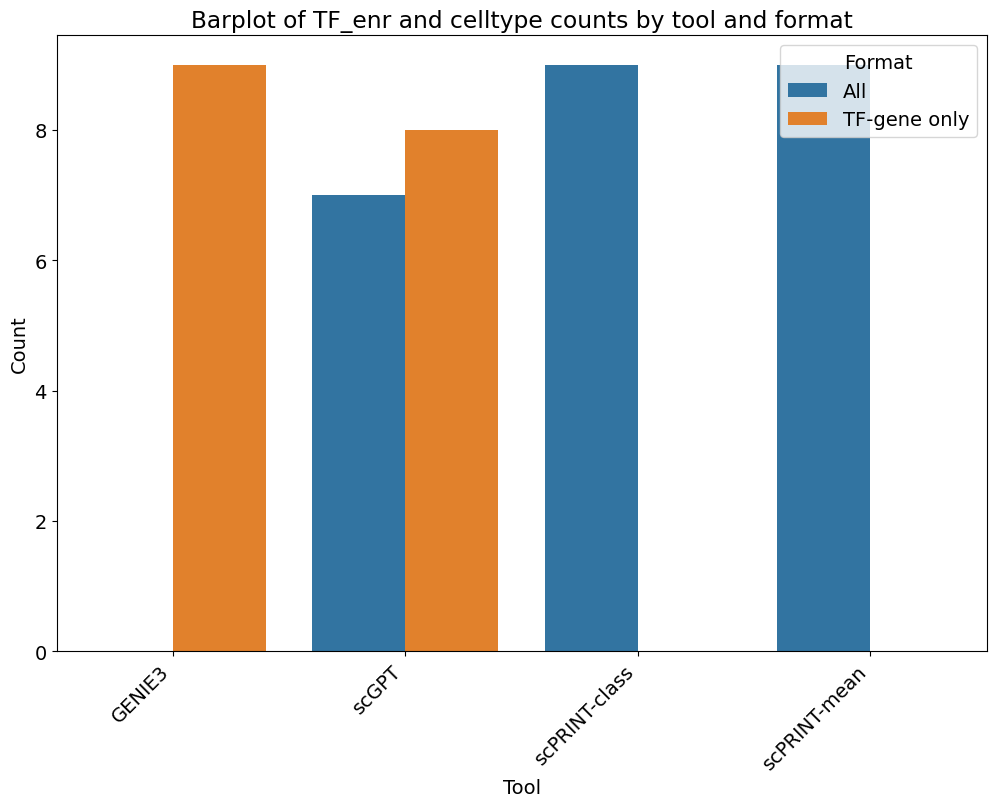

In [38]:
# Count the number of TF_enr and celltype
tf_enr_count = res.groupby(['tool', 'Format'])['TF_enr'].sum().reset_index()
celltype_count = res.groupby(['tool', 'Format'])['celltype'].sum().reset_index()

# Create a new DataFrame for plotting
count_data = pd.merge(tf_enr_count, celltype_count, on=['tool', 'Format'], suffixes=('_TF_enr', '_celltype'))

# Create the barplot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='tool', y="TF_enr", hue='Format', data=count_data)

# Set the title and labels of the plot
bar_plot.set_title('Barplot of TF_enr and celltype counts by tool and format')
bar_plot.set_xlabel('Tool')
bar_plot.set_ylabel('Count')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


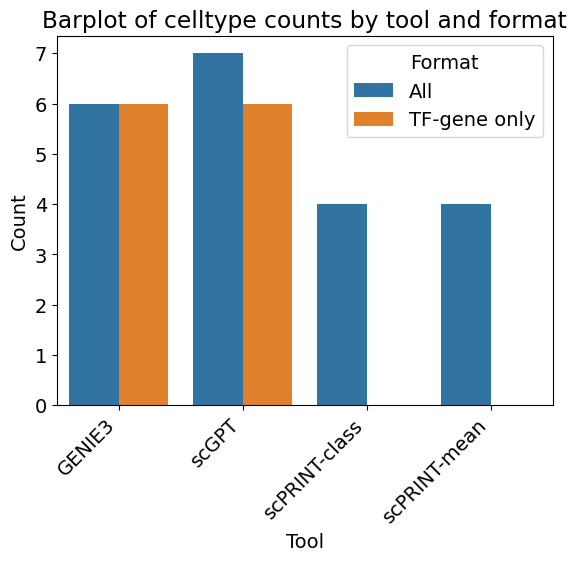

In [39]:
bar_plot = sns.barplot(x='tool', y="celltype", hue='Format', data=count_data)

# Set the title and labels of the plot
bar_plot.set_title('Barplot of celltype counts by tool and format')
bar_plot.set_xlabel('Tool')
bar_plot.set_ylabel('Count')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [43]:
res = pd.read_csv('data/sroy.tsv', sep="\t", )
res

,tool,name,EPR,AUPRC,RAND,TF_only
0,genie3,han,1.44,0.0292,0.0274,False
1,genie3,han_chip,1.21,0.2766,0.2537,False
2,genie3,han_ko,1.12,0.0775,0.0766,True
3,genie3,han,1.12,0.0775,0.0766,True
4,genie3,han_chip,0.78,0.2621,0.2537,True
5,genie3,mine,2.17,0.0282,0.0247,True
6,genie3,mine,1.09,0.0286,0.0247,False
7,genie3,tran,1.22,0.0424,0.0405,True
8,genie3,tran_chip,1.48,0.2291,0.1989,True
9,genie3,tran_ko,0.98,0.0824,0.0796,True


In [50]:
# Melt the dataframe to transform it from wide to long format
res_melted = res.melt(id_vars=['tool', 'name'], value_vars=['EPR', 'AUPRC', 'RAND'], var_name='metric', value_name='value')

ValueError: Index contains duplicate entries, cannot reshape

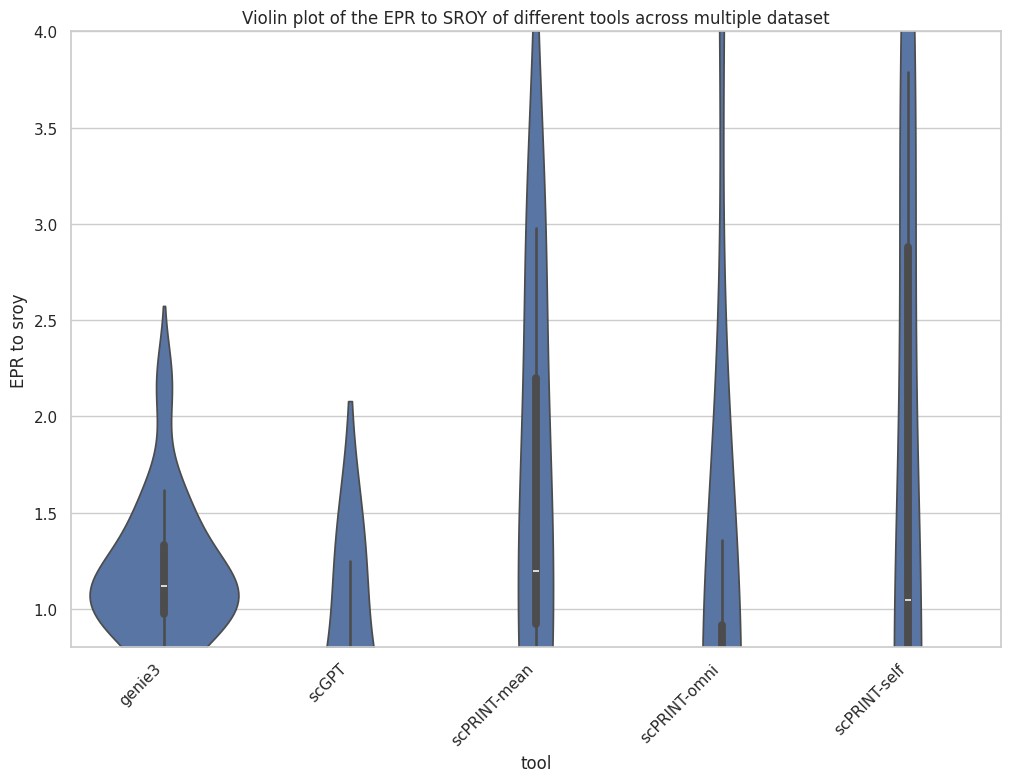

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the violin plot with a focus on the 0.8 - 4 range for the y-axis
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='tool', y='EPR', data=res)
violin_plot.set_ylim(0.8, 4)  # Setting the y-axis limits to focus on the 0.8 - 4 range

# Set the title and labels of the plot
violin_plot.set_title('Violin plot of the EPR to SROY of different tools across multiple dataset')
violin_plot.set_xlabel('tool')
violin_plot.set_ylabel('EPR to sroy')

# Rotate the x labels for better readability and align them
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [62]:
pivoted_res

tool    AUPRC           EPR          RAND        
name                    han    mine   han  mine     han    mine
0           genie3  0.05335  0.0284  1.28  1.63  0.0520  0.0247
1            scGPT  0.02180  0.0244  0.39  0.01  0.0274  0.0321
2     scPRINT-mean  0.06950  0.0244  2.98  0.03  0.0390  0.0270
3     scPRINT-omni  0.05100  0.0221  4.78  0.14  0.0390  0.0270
4     scPRINT-self  0.17530  0.0415  3.79  2.58  0.0827  0.0270

In [74]:
bar_plot = sns.barplot(x='tool', y='EPR', data=pivoted_res, ci=None)

/local/scratch/tmp/ipykernel_3167849/1700908578.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(x='tool', y='EPR', data=pivoted_res, ci=None)


ValueError: Data must be 1-dimensional, got ndarray of shape (5, 2) instead

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for the required names
filtered_res = res[res['name'].isin(['han', 'mine'])]

# Pivot the dataframe to get the metrics as columns
pivoted_res = filtered_res.pivot_table(index='tool', columns='name', values=['EPR', 'AUPRC', 'RAND'])

# Reset the index to use 'tool' as a column for seaborn
pivoted_res = pivoted_res.reset_index()

# Melt the dataframe to long format for seaborn
melted_res = pivoted_res.melt(id_vars='tool', var_name=['metric', 'name'], value_name='value')

# Plotting the stacked bar plot using seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='tool', y='value', hue='name', data=melted_res, ci=None)

# Set the title and labels of the plot
bar_plot.set_title('Stacked Bar Plot of Metrics for Tools with Names "han" and "mine"')
bar_plot.set_xlabel('Tool')
bar_plot.set_ylabel('Value')

# Rotate the x labels for better readability and align them
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['tool']"

In [54]:
res

,tool,name,EPR,AUPRC,RAND,TF_only
0,genie3,han,1.44,0.0292,0.0274,False
1,genie3,han_chip,1.21,0.2766,0.2537,False
2,genie3,han_ko,1.12,0.0775,0.0766,True
3,genie3,han,1.12,0.0775,0.0766,True
4,genie3,han_chip,0.78,0.2621,0.2537,True
5,genie3,mine,2.17,0.0282,0.0247,True
6,genie3,mine,1.09,0.0286,0.0247,False
7,genie3,tran,1.22,0.0424,0.0405,True
8,genie3,tran_chip,1.48,0.2291,0.1989,True
9,genie3,tran_ko,0.98,0.0824,0.0796,True


In [26]:
mat = pd.read_csv('../data/results/other.tsv', sep="\t")
mat

,dataset,metrics,scGPT,GENIE3,scPRINT,scPRINT-class,GENIE3-TF
0,GWPS,TF_enr,1.0,1,1,1.0,NaN
1,GWPS,TF_target_enr,7.8,11,11,22.6,11.0
2,GWPS,celltype_pred,0.0,0,0,1.0,0.0
3,SROY LIU,TF_enr,1.0,1,1,1.0,NaN
4,SROY LIU,TF_target_enr,4.5,0,2,25.0,2.0
5,SROY LIU,celltype_pred,1.0,1,1,1.0,1.0


In [29]:
# Reshape the dataframe 'mat' to have the last four columns as one column with labels as rows
mat_melted = mat.melt(id_vars=mat.columns[:2], value_vars=mat.columns[2:], var_name='tools', value_name='value')
# Display the reshaped dataframe
mat_melted


,dataset,metrics,tools,value
0,GWPS,TF_enr,scGPT,1.0
1,GWPS,TF_target_enr,scGPT,7.8
2,GWPS,celltype_pred,scGPT,0.0
3,SROY LIU,TF_enr,scGPT,1.0
4,SROY LIU,TF_target_enr,scGPT,4.5
5,SROY LIU,celltype_pred,scGPT,1.0
6,GWPS,TF_enr,GENIE3,1.0
7,GWPS,TF_target_enr,GENIE3,11.0
8,GWPS,celltype_pred,GENIE3,0.0
9,SROY LIU,TF_enr,GENIE3,1.0


In [24]:
percentage_increase = res_pivoted / res_pivoted.xs('GENIE3', level='tool') - 1
percentage_increase


metric                                                AUC       EPR
tool                        annotation                             
GENIE3                      chen (19; 3k)        0.000000  0.000000
                            duren (44; 7k)       0.000000  0.000000
                            liu (33; 10k)        0.000000  0.000000
                            liu-chip (90; 435k)  0.000000  0.000000
                            liu-ko (157; 108k)   0.000000  0.000000
                            semrau (38; 4k)      0.000000  0.000000
                            semrau (chip)        0.000000  0.000000
                            semrau (ko)          0.000000  0.000000
GENIE3-TF                   chen (19; 3k)        0.052632 -0.465942
                            duren (44; 7k)       0.130435  0.518919
                            liu (33; 10k)        0.237333 -0.012797
                            liu-chip (90; 435k) -0.093750 -0.150000
                            liu-ko (157; 108k)   0.703704  0.937500
                            semrau (38; 4k)      0.250000  0.238474
                            semrau (chip)        0.165217  0.424490
                            semrau (ko)          0.259259  0.709459
scGPT                       chen (19; 3k)        0.052632  0.242754
                            liu (33; 10k)        0.200000  0.083181
                            liu-chip (90; 435k) -0.025000 -0.074286
                            liu-ko (157; 108k)   0.048148  0.041071
scPRINT-medium              chen (19; 3k)       -0.063158 -0.188406
                            duren (44; 7k)       7.260870 -0.459459
                            liu (33; 10k)       -0.160000 -0.532907
                            liu-chip (90; 435k) -0.218750 -0.257143
                            liu-ko (157; 108k)   0.011111 -0.176786
                            semrau (38; 4k)      0.025000 -0.157393
                            semrau (chip)        0.004348 -0.030612
                            semrau (ko)          0.111111  0.513514
scPRINT-medium + omni-class chen (19; 3k)        0.352632  0.289855
                            duren (44; 7k)      -0.007246  0.000000
                            liu (33; 10k)        0.000000 -0.215722
                            liu-chip (90; 435k) -0.065625 -0.125714
                            liu-ko (157; 108k)   0.240741  0.187500
                            semrau (38; 4k)      0.958333 -0.698728
                            semrau (chip)       -0.014348  0.172449
                            semrau (ko)          0.111111  0.283784
scPRINT-medium + self-class chen (19; 3k)        4.684211 -0.046377
                            duren (44; 7k)      -0.028986  0.000000
                            liu (33; 10k)        0.506667 -0.305302
                            liu-chip (90; 435k) -0.071875  0.150000
                            liu-ko (157; 108k)   0.548148  0.437500
                            semrau (38; 4k)     -0.183333  0.971383
                            semrau (chip)        0.204348 -0.062245
                            semrau (ko)          0.725926  0.608108

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/hom

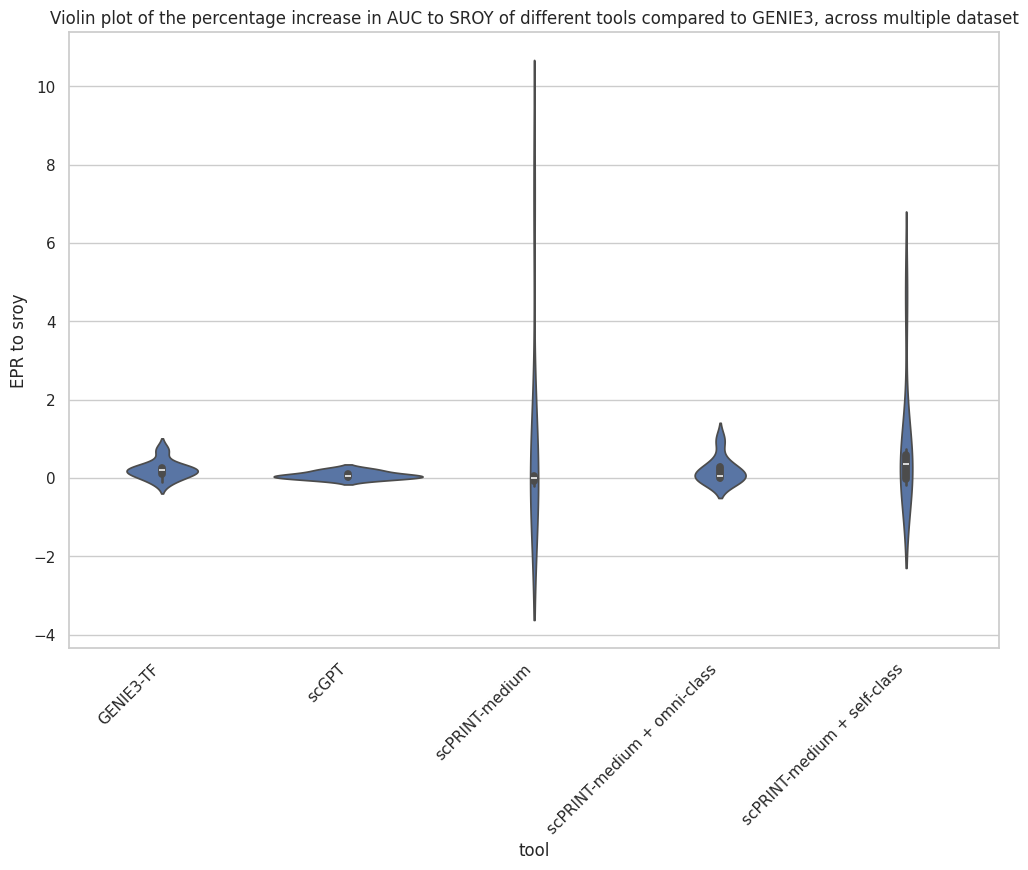

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the violin plot with a focus on the 0.8 - 4 range for the y-axis
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='tool', y='AUC', data=percentage_increase.iloc[8:])
#violin_plot.set_ylim(0.8, 4)  # Setting the y-axis limits to focus on the 0.8 - 4 range

# Set the title and labels of the plot
violin_plot.set_title('Violin plot of the percentage increase in AUC to SROY of different tools compared to GENIE3, across multiple dataset')
violin_plot.set_xlabel('tool')
violin_plot.set_ylabel('EPR to sroy')

# Rotate the x labels for better readability and align them
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()